# Data Science Final Project: Group2

**Title:**  Sleep Disorder Classification

**Objective:** Develop a predictive model to classify individuals as either having or not having a sleep disorder based on relevant features.

**Dataset:** Sleep Health and Lifestyle Dataset (Kaggle)

**Link:** https://www.kaggle.com/code/wilmerarltstrmberg/sleep-disorder-feature-analysis

In [1]:
# Import Needed Libraries

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics

# 1. Exploration of Data Analysis

1.1 CHARACTERISTIC OF DATA

In [2]:
#***Load the data and print a few row***

file_path = "Sleep_health_and_lifestyle_dataset.csv" 
myData = pd.read_csv(file_path)
myData.head(10)  

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [3]:
#***Count the number of rows and columns in the dataset***

myData.shape

(374, 13)

We can see that there are 374 rows and 13 columns in the dataset.

In [4]:
#***Check the data types***

myData.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [5]:
# ***Get the column names in the dataset***

print("Column names:")
for col in myData.columns:
        print(col)

Column names:
Person ID
Gender
Age
Occupation
Sleep Duration
Quality of Sleep
Physical Activity Level
Stress Level
BMI Category
Blood Pressure
Heart Rate
Daily Steps
Sleep Disorder


In [6]:



# ***Get some statistics on the dataset***

myData.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


After getting these statistics, 
We can see the average age was 42.184 and
the oldest in this dataset was 59 years old,
while the youngest was 27 years old. 

1.2 DATA CLEANSING

In [7]:
#***Check if there's missing values in all columns***

nan_count = myData.isna().sum()
print(nan_count)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


We can see that there are no missing values in the dataset. Now, we will turn categorical variables into numbers to make it easier to create visualizations.

In [8]:
# ***Encoding categorical variables***


#Encode 'Sleep Disorder' column: 1 for 'Sleep Apnea' or 'Insomnia', and 0 for 'None' 
myData['Sleep Disorder Numeric'] = myData['Sleep Disorder'].map(lambda x: 1 if x in ['Sleep Apnea', 'Insomnia'] else 0)

#Encode 'Gender' column: 1 for 'Female', and 0 for 'Male'
myData['Gender Numeric'] = myData['Gender'].map(lambda x: 1 if x in ['Female'] else 0)

#Encode 'BMI Category' column:
bmi_mapping = {
    'Normal': 0,
    'Normal Weight': 0,
    'Overweight': 1,
    'Obese': 1,
}
myData['BMI Category Numeric'] = myData['BMI Category'].map(bmi_mapping)

#Encode 'Occupation Numeric' column:
le = LabelEncoder()
myData['Occupation Numeric'] = le.fit_transform(myData['Occupation'])


# 2. Data Visualization

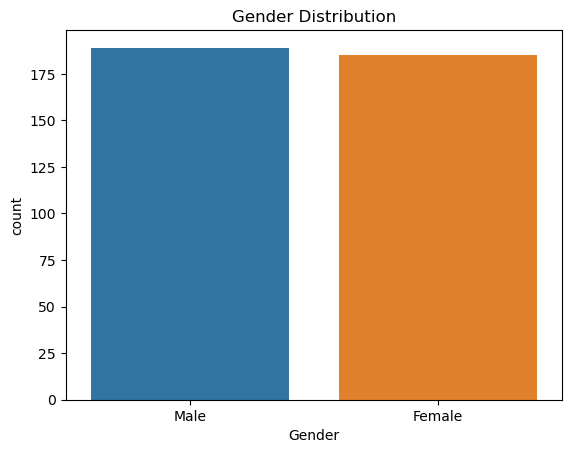

In [9]:
# ***Countplot for Gender distribution***
sns.countplot(x='Gender', data=myData)
plt.title('Gender Distribution')
plt.show()

Visualize the Gender Distribution by using a bar plot.It's clear that there are slightly more males than females.

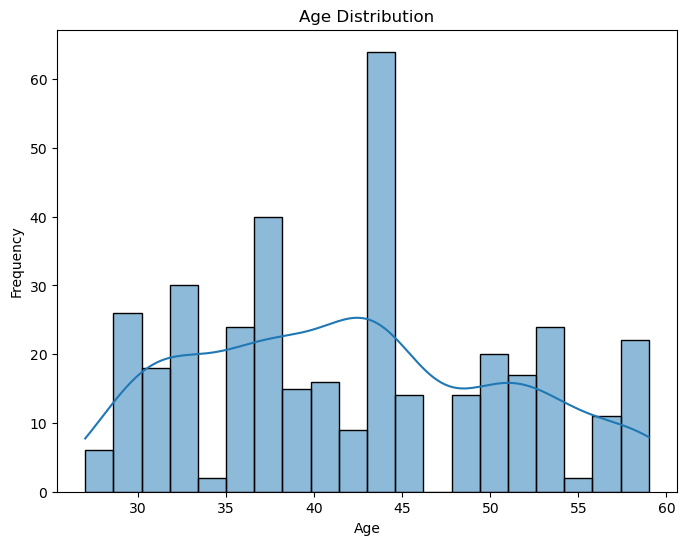

In [10]:
# ***Histogram for Age distribution***
plt.figure(figsize=(8, 6))
sns.histplot(myData['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

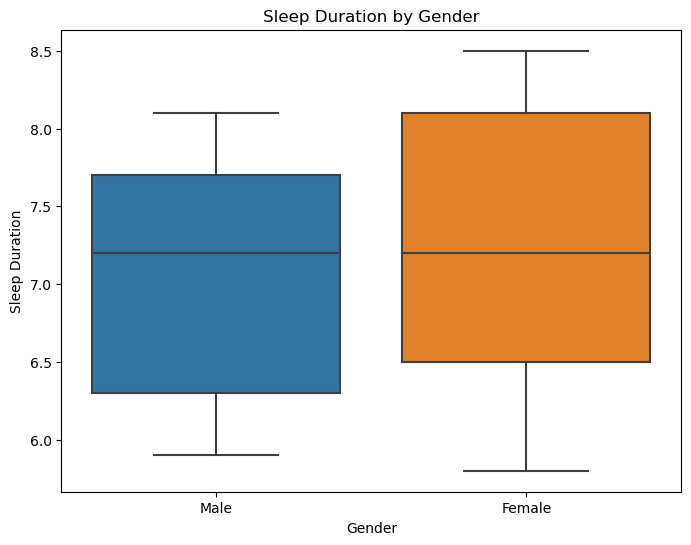

In [11]:
# Boxplot for Sleep Duration by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=myData)
plt.title('Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()

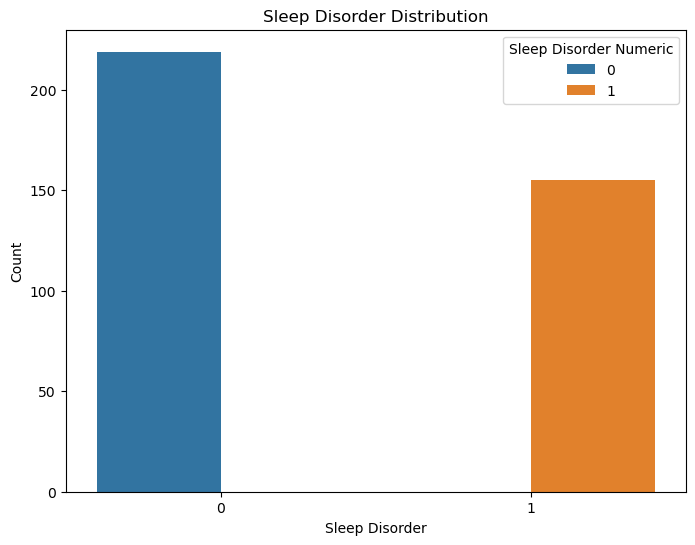

In [12]:

# Countplot for Sleep Disorder
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Disorder Numeric',hue='Sleep Disorder Numeric', data=myData)
plt.title('Sleep Disorder Distribution')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

#Note:
# 0 = None
# 1 = Sleep Disorder

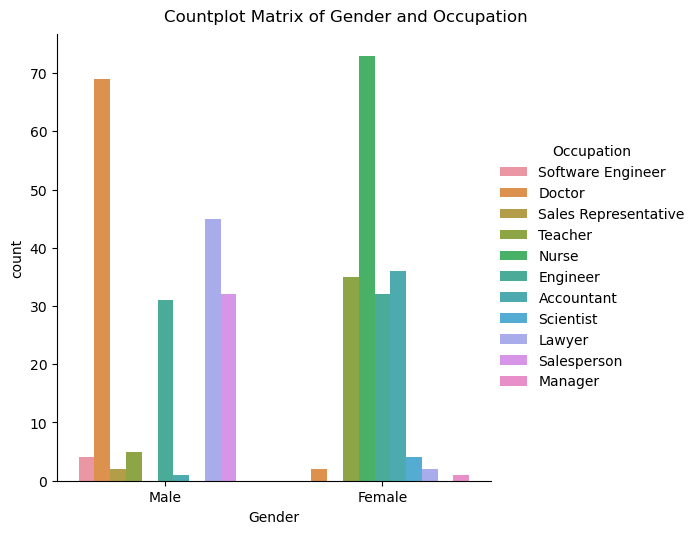

In [13]:

# Countplot Matrix of Gender and Occupation
sns.catplot(x='Gender', hue='Occupation', kind='count', data=myData)
plt.suptitle('Countplot Matrix of Gender and Occupation', y=1.02)
plt.show()

The result from countplot above, We can see the majority of females are in the nursing profession, while the majority of males are doctors.

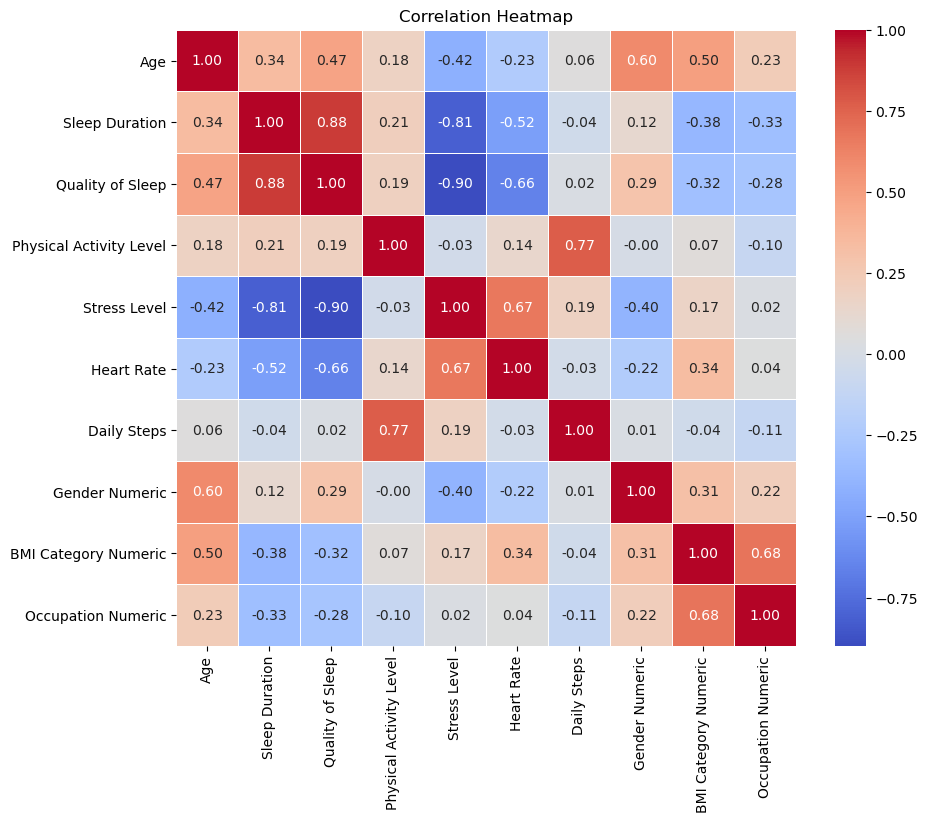

In [14]:
# Drop Categories Columns 
df = myData.drop(columns=['Person ID','Occupation','BMI Category','Blood Pressure','Sleep Disorder','Gender','Sleep Disorder Numeric'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

With The correlation matrix above, We can see that Occupation and BMI category show a strong correlation, as do sleep duration and sleep quality.


# 3. Modeling


3.1 MODEL IMPLEMENTATION

In [15]:
#***Prepare Data for Model Training***

In [16]:
columns_except_target = [col for col in myData.columns if col != 'Sleep Disorder Numeric']
new_order = columns_except_target + ['Sleep Disorder Numeric']
newData = myData[new_order]
newData

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender Numeric,BMI Category Numeric,Occupation Numeric,Sleep Disorder Numeric
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,0,1,9,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,0,0,1,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,0,0,1,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0,1,6,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1,5,1
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1,5,1
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1,5,1
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1,5,1


In [17]:
#***Drop Categories Column***

columnsToDrop = ['Person ID','Gender','Occupation','BMI Category','Blood Pressure','Sleep Disorder']
dataAfterDropped = newData.drop(columns=columnsToDrop)
dataAfterDropped

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender Numeric,BMI Category Numeric,Occupation Numeric,Sleep Disorder Numeric
0,27,6.1,6,42,6,77,4200,0,1,9,0
1,28,6.2,6,60,8,75,10000,0,0,1,0
2,28,6.2,6,60,8,75,10000,0,0,1,0
3,28,5.9,4,30,8,85,3000,0,1,6,1
4,28,5.9,4,30,8,85,3000,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,1,1,5,1
370,59,8.0,9,75,3,68,7000,1,1,5,1
371,59,8.1,9,75,3,68,7000,1,1,5,1
372,59,8.1,9,75,3,68,7000,1,1,5,1


In [18]:
#***Split data into independent(input features) and dependent variables (output)***

X = dataAfterDropped.iloc[:, 0:10].values 
Y = dataAfterDropped.iloc[:, -1].values 

In [19]:
#***Split the data again, this time into 80% training(X_train and Y_train) and 20% testing (X_test and Y_test) data sets***

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MODEL EVALUATION

In [21]:
#***Create a function within many Machine Learning Models***

def model_training01(X_train,Y_train):
    
    #Using Logistic Regression Algorithm to the Training Set
    log = LogisticRegression(random_state = 42)
    log.fit(X_train, Y_train)
    
    #Using SVC method of svm class to use Support Vector Machine Algorithm
    svc_lin = SVC(kernel = 'linear', random_state = 42)
    svc_lin.fit(X_train, Y_train)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
    tree.fit(X_train, Y_train)
    
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
    forest.fit(X_train, Y_train)
    
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    
    print('[2]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))

    print('[3]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, svc_lin, tree, forest

In [22]:
#***Print Models***
model = model_training01(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.903010033444816
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.903010033444816
[2]Decision Tree Classifier Training Accuracy: 0.939799331103679
[3]Random Forest Classifier Training Accuracy: 0.939799331103679


There are two models with the same highest accuracy of 0.9397%.

In [23]:
#Show the confusion matrix and accuracy for all the models on the test data.

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line
    


[[40  3]
 [ 3 29]]
Model[0] Testing Accuracy = "0.92 !"

[[40  3]
 [ 3 29]]
Model[1] Testing Accuracy = "0.92 !"

[[42  1]
 [ 4 28]]
Model[2] Testing Accuracy = "0.9333333333333333 !"

[[42  1]
 [ 4 28]]
Model[3] Testing Accuracy = "0.9333333333333333 !"



In [24]:
#Evaluation Score For Logistic Regression
print(metrics.classification_report(Y_test,
									model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [25]:
#Evaluation Score For Support Vector Machine
print(metrics.classification_report(Y_test,
									model[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [26]:
#Evaluation Score For Decision Tree Classifier
print(metrics.classification_report(Y_test,
									model[2].predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [27]:
#Evaluation Score For Random Forest Classifier
print(metrics.classification_report(Y_test,
									model[3].predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



The models at positions 2 and 3 demonstrated the highest accuracy on the test data among all models evaluated.

NOTE:

False Positive (FP)= A test result which incorrectly indicates that a particular condition or attribute is present.

True Positive (TP)= Sensitivity (also called the true positive rate, or probability of detection in some fields), measures the proportion of actual positives that are correctly identified as such.

True Negative (TN)= Specificity (also called the true negative rate), measures the proportion of actual negatives that are correctly identified as such.

False Negative (FN)= A test result that indicates that a condition does not hold, while in fact, it does.

MODEL SELECTED

The model that we will use to predict if an individual would've sleep disorder, will be the model at position 3 which is the Random Forest Classifier. 
We choose that model becuase it performed the best, achieving 93.97% accuracy on the training data and 93.33% on the testing data.

Print the Random Forest Classifier Model Predictions for each person and, below it, print the actual values.
In our prediction model, 
'1' indicates the presence of a sleep disorder.
'0' signifies that the person is normal.

New Data Testing on Selected Model

Now that we have analyzed the data, created our models and a chosen model for predicting sleep disorders, 
Let's test and see how well our predictions hold up!!!


We will create a varible of a person named "Emma".
1. Age = 21.
2. Sleep duration = 7.
3. Quality of sleep = 6
4. Physical activity level(minutes/day) = 30
5. Stress level = 7
6. Heart rate = 85
7. Daily steps = 3800
8. Gender = 1
9. BMI = 0
10. Occupation = 9 (software engineer)


In [28]:
my_sleep_condition = [[20,8,7,30,4,80,2400,0,0,9]]

#Print Prediction of Random Forest Classifier model
pred = model[2].predict(my_sleep_condition)
print(pred)

if pred == 0:
    print("Great news! There's no indication of a sleep disorder for you.")
else:
  print("Yikes! It seems you may be dealing with a sleep disorder!!!")

[0]
Great news! There's no indication of a sleep disorder for you.


# Modeling With Selected Input Features Based On Correlation Heatmap

In [29]:
#***Drop Columns***

columnsToDrop02 = ['Quality of Sleep','Heart Rate','Daily Steps','Gender Numeric','Occupation Numeric']
dataAfterDropped02 = dataAfterDropped.drop(columns=columnsToDrop02)
dataAfterDropped02

,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category Numeric,Sleep Disorder Numeric
0,27,6.1,42,6,1,0
1,28,6.2,60,8,0,0
2,28,6.2,60,8,0,0
3,28,5.9,30,8,1,1
4,28,5.9,30,8,1,1
...,...,...,...,...,...,...
369,59,8.1,75,3,1,1
370,59,8.0,75,3,1,1
371,59,8.1,75,3,1,1
372,59,8.1,75,3,1,1


In [30]:
#***Split data into independent(input features) and dependent variables (output)***

X01 = dataAfterDropped02.iloc[:, 0:5].values 
Y02 = dataAfterDropped02.iloc[:, -1].values 

In [31]:
#***Split the data again, this time into 80% training(X_train and Y_train) and 20% testing (X_test and Y_test) data sets***

X_train02, X_test02, Y_train02, Y_test02 = train_test_split(X01, Y02, test_size=0.2, random_state=42)

In [32]:
#***Create a function within many Machine Learning Models***

def model_training02(X_train02,Y_train02):
    
    #Using Logistic Regression Algorithm to the Training Set
    log = LogisticRegression(random_state = 42)
    log.fit(X_train02, Y_train02)
    
    #Using SVC method of svm class to use Support Vector Machine Algorithm
    svc_lin = SVC(kernel = 'linear', random_state = 42)
    svc_lin.fit(X_train02, Y_train02)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
    tree.fit(X_train02, Y_train02)
    
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
    forest.fit(X_train02, Y_train02)
    
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train02, Y_train02))
    
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train02, Y_train02))
    
    print('[2]Decision Tree Classifier Training Accuracy:', tree.score(X_train02, Y_train02))

    print('[3]Random Forest Classifier Training Accuracy:', forest.score(X_train02, Y_train02))
    
    return log, svc_lin, tree, forest

In [33]:
#***Print Models***
model02 = model_training02(X_train02,Y_train02)

[0]Logistic Regression Training Accuracy: 0.903010033444816
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.903010033444816
[2]Decision Tree Classifier Training Accuracy: 0.939799331103679
[3]Random Forest Classifier Training Accuracy: 0.939799331103679


In [34]:
#Show the confusion matrix and accuracy for all the models on the test data.

for i in range(len(model02)):
    cm = confusion_matrix(Y_test02, model02[i].predict(X_test02)) 
   #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test02, model02[i].predict(X_test02)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line


[[40  3]
 [ 4 28]]
Model[0] Testing Accuracy = "0.9066666666666666 !"

[[40  3]
 [ 3 29]]
Model[1] Testing Accuracy = "0.92 !"

[[42  1]
 [ 4 28]]
Model[2] Testing Accuracy = "0.9333333333333333 !"

[[42  1]
 [ 4 28]]
Model[3] Testing Accuracy = "0.9333333333333333 !"



In [35]:
#Evaluation Score For Logistic Regression
print(metrics.classification_report(Y_test,
									model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [36]:
#Evaluation Score For Support Vector Machine
print(metrics.classification_report(Y_test,
									model[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [37]:
#Evaluation Score For Decision Tree Classifier
print(metrics.classification_report(Y_test,
									model[2].predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [38]:
#Evaluation Score For Random Forest Classifier
print(metrics.classification_report(Y_test,
									model[3].predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



We will create a new variable with the below selected input features:
1. Age = 21.
2. Sleep duration = 7.
3. Physical Activity Level = 30
4. Stress Level = 7
5. BMI = 0

In [39]:
my_sleep_condition02 = [[21,7,30,7,1]]

#Print Prediction of Random Forest Classifier model
pred02 = model02[2].predict(my_sleep_condition02)
print(pred02)

if pred02 == 0:
    print("Great news! There's no indication of a sleep disorder for you.")
else:
  print("Yikes! It seems you may be dealing with a sleep disorder!!!")

[1]
Yikes! It seems you may be dealing with a sleep disorder!!!


# Conclusion

That is it, We are done creating the program to predict if an individual would have sleep disorder or not!

Future Work:

+Integration of Aditional Data Scources (to provide more comprehensive view, and improve the accuracy of the classification)

+Fine-tuning Model Hyperparameters (explore advanced techniques such grid search, to improve the model's performance and capabilities)
